## Importing necessary libraries

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sbn
from sklearn import preprocessing                       # Data Transformation with StandardScaler()
from sklearn.utils import resample
from sklearn.model_selection import train_test_split    #For splitting dataset into training and testing dataset
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier     #For Random Forest algorithm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier      #For KNN algorithm
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score              #For accuracy score
from sklearn.metrics import classification_report       #For classification report
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

## Importing library

In [2]:
df = pd.read_excel('breast-cancer.xlsx')

## Number of columns and rows

In [3]:
df.shape

(574, 32)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Basic info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       572 non-null    float64
 1   diagnosis                572 non-null    object 
 2   radius_mean              564 non-null    float64
 3   texture_mean             571 non-null    float64
 4   perimeter_mean           561 non-null    float64
 5   area_mean                568 non-null    float64
 6   smoothness_mean          563 non-null    float64
 7   compactness_mean         561 non-null    float64
 8   concavity_mean           563 non-null    float64
 9   concave points_mean      568 non-null    float64
 10  symmetry_mean            570 non-null    float64
 11  fractal_dimension_mean   557 non-null    float64
 12  radius_se                570 non-null    float64
 13  texture_se               571 non-null    float64
 14  perimeter_se             5

## Basic statistic

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.720000e+02,564.00000,571.000000,561.000000,568.000000,563.000000,561.000000,563.000000,568.000000,570.000000,...,573.000000,573.000000,573.000000,573.000000,572.000000,568.000000,572.000000,572.000000,574.000000,560.000000
mean,3.005658e+07,14.08975,19.284466,91.940945,652.722535,0.096350,0.103926,0.087639,0.048579,0.180848,...,16.239300,25.702251,107.092269,878.040838,0.132411,0.255079,0.272123,0.114356,0.289661,0.083896
std,1.246978e+08,3.52124,4.296954,24.331693,350.698096,0.014072,0.052506,0.078274,0.038676,0.027241,...,4.829234,6.139815,33.556541,568.284824,0.022787,0.156638,0.207904,0.065467,0.061789,0.018084
min,8.670000e+03,6.98100,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.66750,16.195000,75.030000,420.175000,0.086210,0.065260,0.029570,0.020310,0.161900,...,12.980000,21.100000,83.990000,514.000000,0.116600,0.148100,0.115925,0.064967,0.249100,0.071412
50%,9.064145e+05,13.27500,18.820000,86.240000,546.350000,0.095870,0.093620,0.059990,0.033300,0.178800,...,14.920000,25.460000,97.650000,684.600000,0.131400,0.216100,0.226200,0.099425,0.281850,0.079960
75%,8.812824e+06,15.78000,21.750000,104.100000,781.400000,0.105200,0.129800,0.126950,0.071330,0.195400,...,18.760000,29.720000,125.100000,1070.000000,0.146000,0.337600,0.381400,0.161300,0.317575,0.091855
max,9.113205e+08,28.11000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Checking for duplicated rows

In [7]:
df.duplicated().sum()

5

## Dropping duplicated rows

In [8]:
df.drop_duplicates(keep=False, inplace=True)

## Checking columns with missing values

In [9]:
df.isna().sum()

id                          2
diagnosis                   2
radius_mean                10
texture_mean                3
perimeter_mean             13
area_mean                   6
smoothness_mean            11
compactness_mean           13
concavity_mean             11
concave points_mean         6
symmetry_mean               4
fractal_dimension_mean     17
radius_se                   4
texture_se                  3
perimeter_se                5
area_se                     0
smoothness_se              15
compactness_se              7
concavity_se                1
concave points_se           6
symmetry_se                10
fractal_dimension_se        7
radius_worst                1
texture_worst               1
perimeter_worst             1
area_worst                  1
smoothness_worst            2
compactness_worst           6
concavity_worst             2
concave points_worst        2
symmetry_worst              0
fractal_dimension_worst    14
dtype: int64

## Dropping id column

In [10]:
df.drop(['id'],axis=1,inplace=True)

## Dropping rows with missing values

In [11]:
df = df.dropna(subset=['diagnosis', 'concavity_se', 'radius_worst', 'texture_worst','perimeter_worst','area_worst', 'concavity_worst', 'concavity_worst'])

## Imputation of missing values using median

In [12]:
df["texture_mean"].fillna(value = df["texture_mean"].median(), inplace=True)
df["radius_mean"].fillna(value = df["radius_mean"].median(), inplace=True)
df["perimeter_mean"].fillna(value = df["perimeter_mean"].median(), inplace=True)
df["area_mean"].fillna(value = df["area_mean"].median(), inplace=True)
df["smoothness_mean"].fillna(value = df["smoothness_mean"].median(), inplace=True)
df["compactness_mean"].fillna(value = df["compactness_mean"].median(), inplace=True)
df["concavity_mean"].fillna(value = df["concavity_mean"].median(), inplace=True)
df["concave points_mean"].fillna(value = df["concave points_mean"].median(), inplace=True)
df["symmetry_mean"].fillna(value = df["symmetry_mean"].median(), inplace=True)
df["fractal_dimension_mean"].fillna(value = df["fractal_dimension_mean"].median(), inplace=True)
df["radius_se"].fillna(value = df["radius_se"].median(), inplace=True)
df["texture_se"].fillna(value = df["texture_se"].median(), inplace=True)
df["perimeter_se"].fillna(value = df["perimeter_se"].median(), inplace=True)
df["smoothness_se"].fillna(value = df["smoothness_se"].median(), inplace=True)
df["compactness_se"].fillna(value = df["compactness_se"].median(), inplace=True)
df["concave points_se"].fillna(value = df["concave points_se"].median(), inplace=True)
df["symmetry_se"].fillna(value = df["symmetry_se"].median(), inplace=True)
df["fractal_dimension_se"].fillna(value = df["fractal_dimension_se"].median(), inplace=True)
df["smoothness_worst"].fillna(value = df["smoothness_worst"].median(), inplace=True)
df["compactness_worst"].fillna(value = df["compactness_worst"].median(), inplace=True)
df["concave points_worst"].fillna(value = df["concave points_worst"].median(), inplace=True)
df["fractal_dimension_worst"].fillna(value = df["fractal_dimension_worst"].median(), inplace=True)

<ipython-input-12-03923ccb8ca4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["texture_mean"].fillna(value = df["texture_mean"].median(), inplace=True)
<ipython-input-12-03923ccb8ca4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["radius_mean"].fillna(value = df["radius_mean"].median(), inplace=True)
<ipython-input-12-03923ccb8ca4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["perimeter_mean"].fillna(value = df["peri

## Checking if there are any missing values left

In [13]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Checking values on diagnosis column

In [14]:
df['diagnosis'].value_counts()

B    347
M    210
Name: diagnosis, dtype: int64

## Converting data type for diagnosis

In [15]:
from sklearn.preprocessing import LabelEncoder
# Iterate through column to convert to numeric data using LabelEncoder ()
data_column_category = df.select_dtypes (exclude=[np.number]).columns
label_encoder = LabelEncoder()
for i in data_column_category:
  df[i] = label_encoder.fit_transform (df[i])

<ipython-input-15-fd8fbd42c4f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = label_encoder.fit_transform (df[i])


## Oversampling

In [16]:
# Separate majority and minority classes
df_majority = df[df.diagnosis==0]
df_minority = df[df.diagnosis==1]

In [17]:
# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=347,    # to match majority class
                                 random_state=123) # reproducible results

In [18]:
# Combine majority class with upsampled minority class
df = pd.concat([df_majority, df_minority_upsampled])

In [19]:
df.diagnosis.value_counts()

0    347
1    347
Name: diagnosis, dtype: int64

## Exploratory Data Analysis

Text(0, 0.5, 'Count')

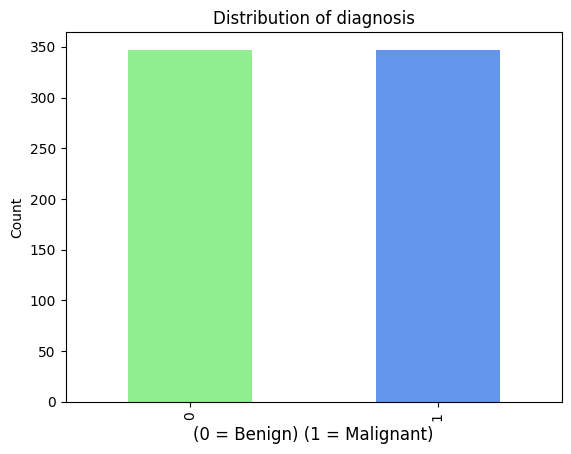

In [20]:
ax = df['diagnosis'].value_counts() \
    .plot(kind='bar', title='Distribution of diagnosis', color=["lightgreen", "cornflowerblue"])
ax.set_xlabel("(0 = Benign) (1 = Malignant)", fontsize=12)
ax.set_ylabel('Count')

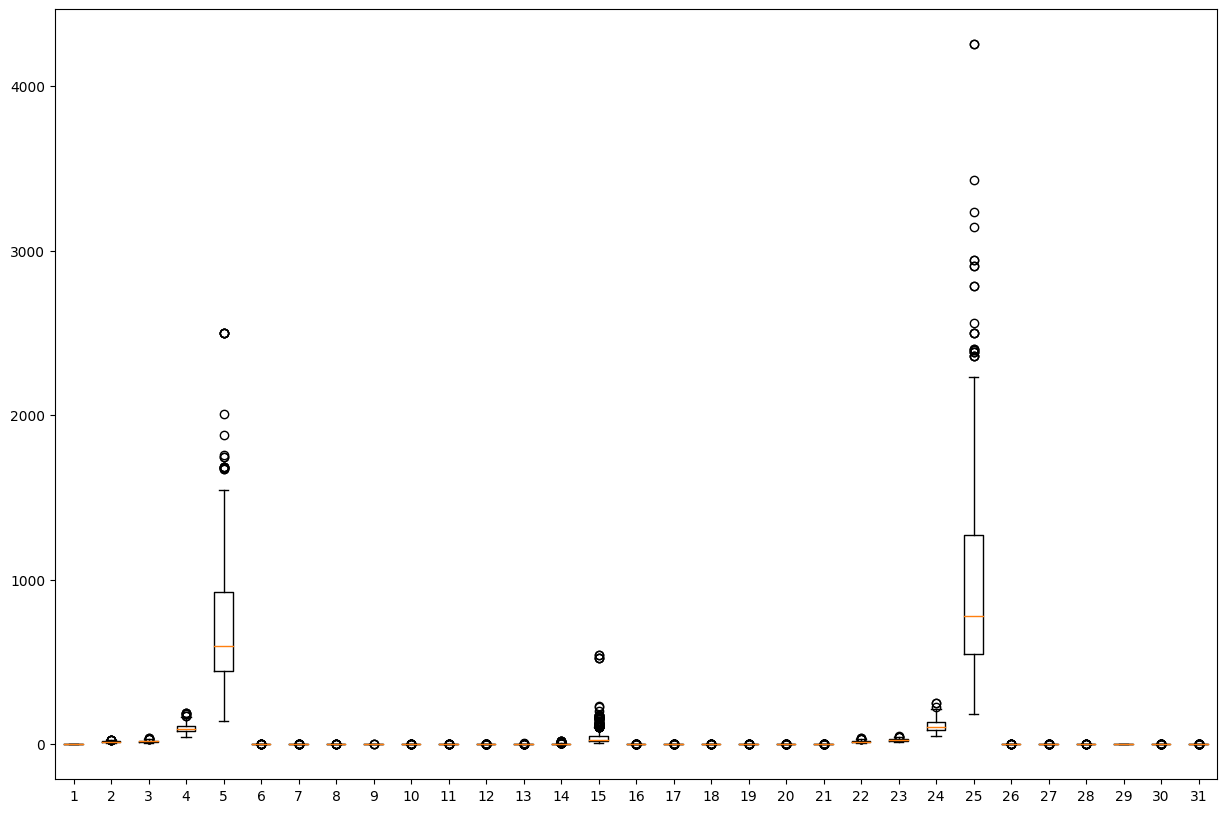

In [21]:
plt.figure(figsize=(15,10))
plt.boxplot(df)
plt.show()

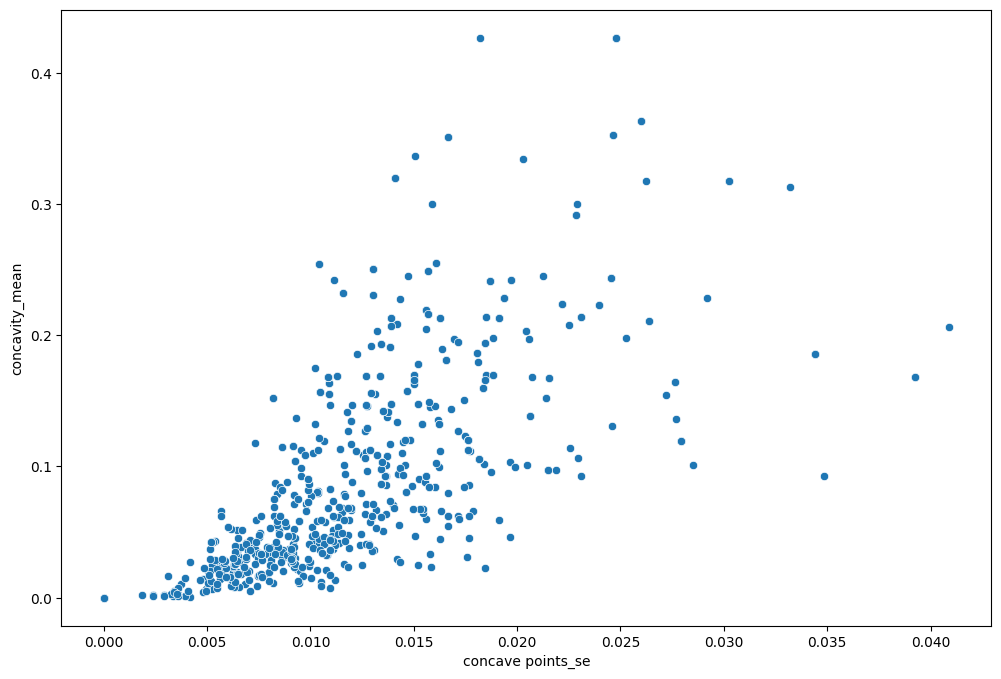

In [22]:
plt.figure(figsize=(12,8))
sbn.scatterplot(x='concave points_se', y='concavity_mean', data=df)
plt.show()

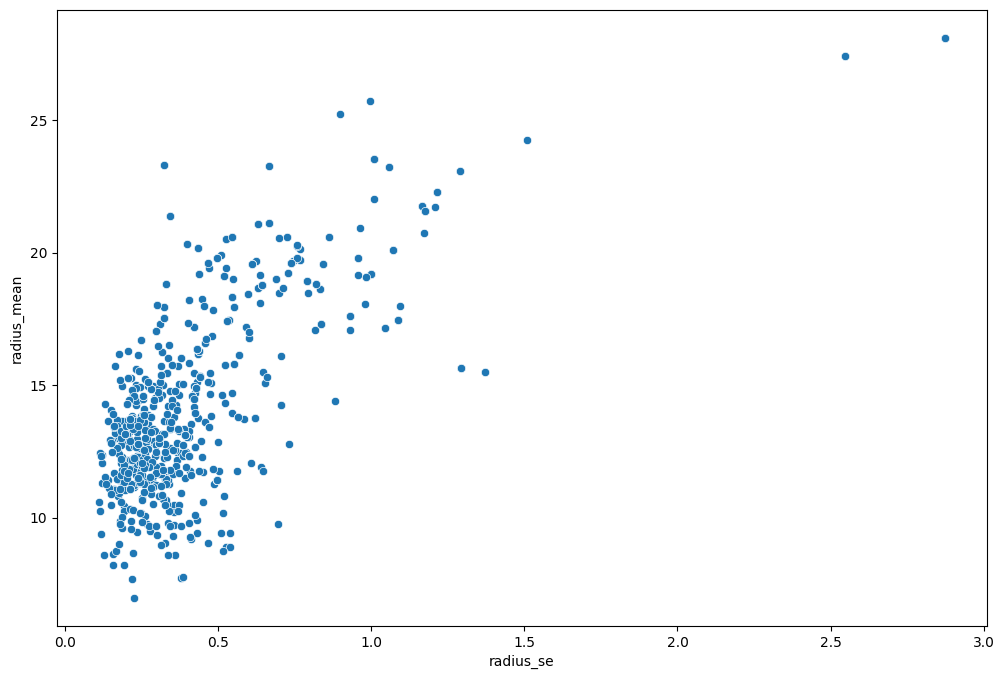

In [23]:
plt.figure(figsize=(12,8))
sbn.scatterplot(x='radius_se', y='radius_mean', data=df)
plt.show()

<Axes: xlabel='texture_se', ylabel='Count'>

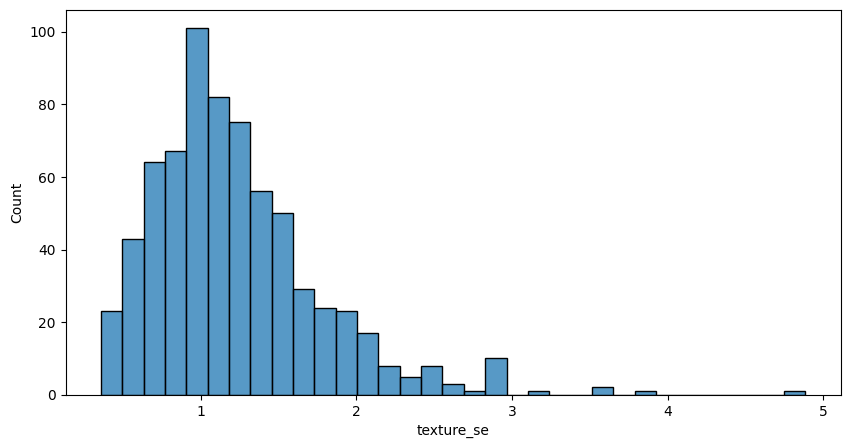

In [24]:
plt.figure(figsize=(10,5))
sbn.histplot(data=df['texture_se'])


<Axes: xlabel='texture_worst', ylabel='Count'>

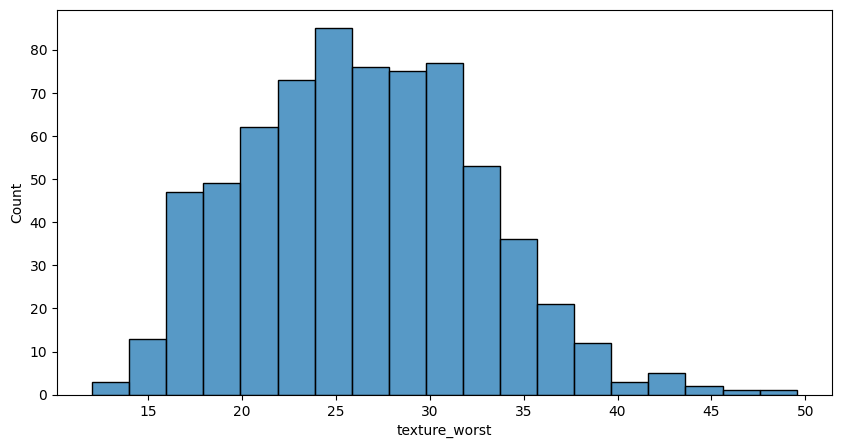

In [25]:
plt.figure(figsize=(10,5))
sbn.histplot(data=df['texture_worst'])

# Splitting the dataset according to the features

In [26]:
df_mean = df[df.columns[:11]]
df_se = df.drop(df.columns[1:11], axis=1)
df_se = df_se.drop(df_se.columns[11:], axis=1)
df_worst = df.drop(df.columns[1:21], axis=1)

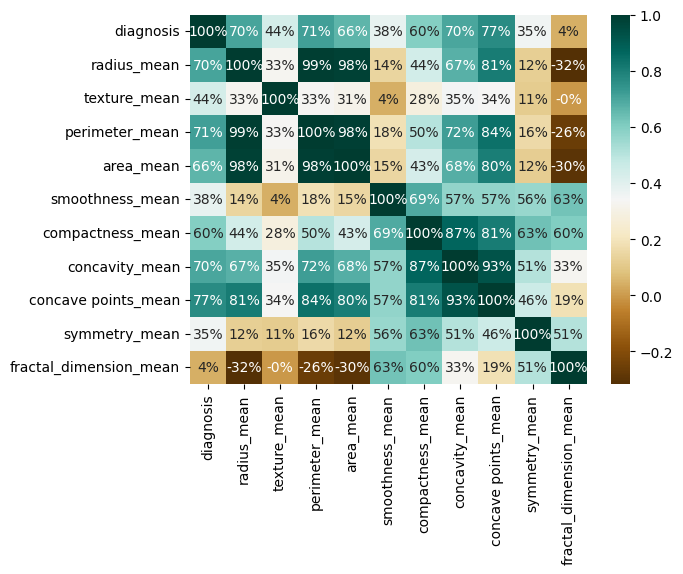

In [27]:
g = sbn.heatmap(df_mean.corr(),annot=True, fmt='.0%', cmap = "BrBG")

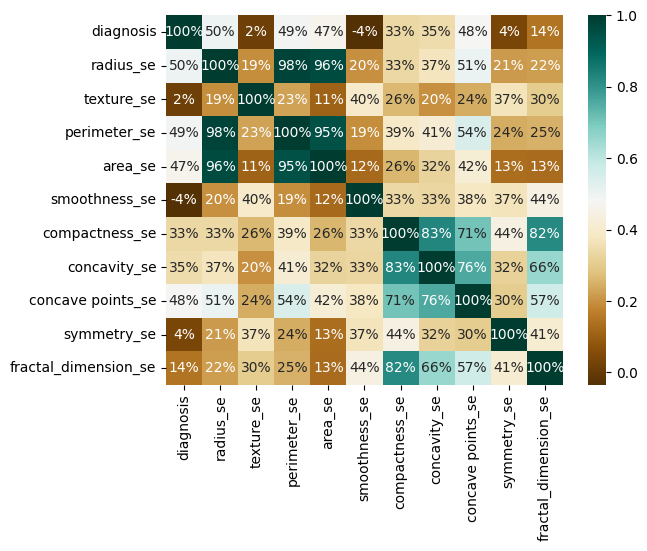

In [28]:
g = sbn.heatmap(df_se.corr(),annot=True, fmt='.0%', cmap = "BrBG")

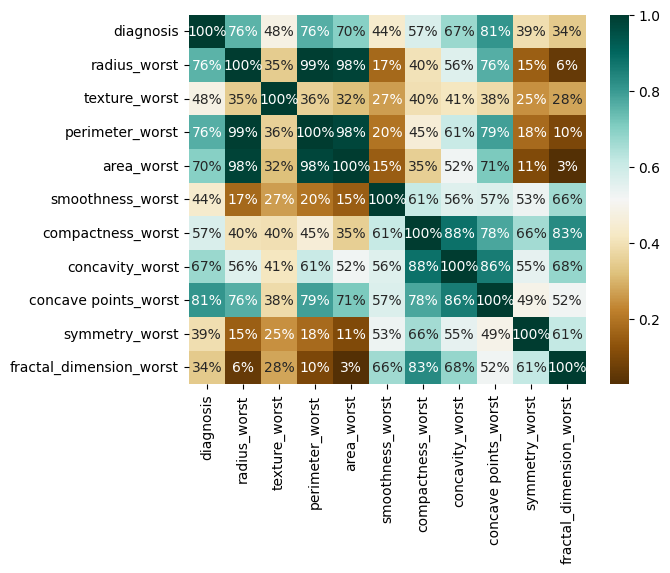

In [29]:
g = sbn.heatmap(df_worst.corr(),annot=True, fmt='.0%', cmap = "BrBG")

## Feature Scaling

In [30]:
std_scale = preprocessing.StandardScaler().fit_transform (df)
scaled_frame = pd.DataFrame (std_scale, columns = df.columns)

In [31]:
df_dummies = pd.get_dummies(df, drop_first=True)
print ("There are {} columns in df_dummies".format (df_dummies.shape[1]))

df_shuffled = shuffle (df_dummies, random_state=42)

There are 31 columns in df_dummies


In [32]:
X = df_shuffled.drop ("diagnosis", axis=1) # axis=1, drop the DV column, don't axis = 0
y = df_shuffled ["diagnosis"] # this our depenedent variable?

## Splitting dataset

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [34]:
print (X_train.head ())

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
193        12.34        18.855           81.15      477.4          0.10340   
192         9.72        18.220           60.73      288.1          0.06950   
125        13.85        17.210           88.44      588.7          0.08785   
361        13.30        21.570           85.24      546.1          0.08582   
420        11.57        19.040           74.20      409.7          0.08546   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
193           0.13530         0.10850              0.04562         0.1943   
192           0.02344         0.00000              0.00000         0.1653   
125           0.06136         0.01420              0.01141         0.1614   
361           0.06373         0.03344              0.02424         0.1815   
420           0.07722         0.05485              0.01428         0.2031   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
193

## Decision Tree

In [35]:
#Define Decision tree classifier model
DT_clf = DecisionTreeClassifier()

In [36]:
# Train Decision Tree Classifer
DT_clf = DT_clf.fit(X_train,y_train)

In [37]:
#Predict the response for test dataset
DT_pred = DT_clf.predict(X_test)

In [38]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, DT_pred))

Accuracy: 0.9665071770334929


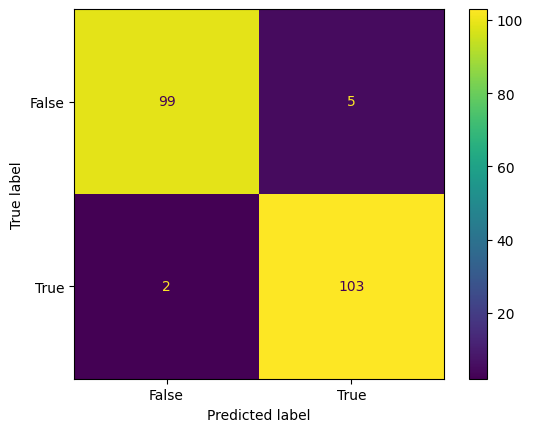

In [39]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, DT_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

cm_display.plot()
plt.show()

In [40]:
print("\nClassification report:")
print(classification_report (y_test, DT_pred))


Classification report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       104
           1       0.95      0.98      0.97       105

    accuracy                           0.97       209
   macro avg       0.97      0.97      0.97       209
weighted avg       0.97      0.97      0.97       209



## Random Forest

In [41]:
RF_model= RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
RF_pred=RF_model.predict(X_test)

In [43]:
RF_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [44]:
accuracy_score(y_test,RF_pred)

0.9712918660287081

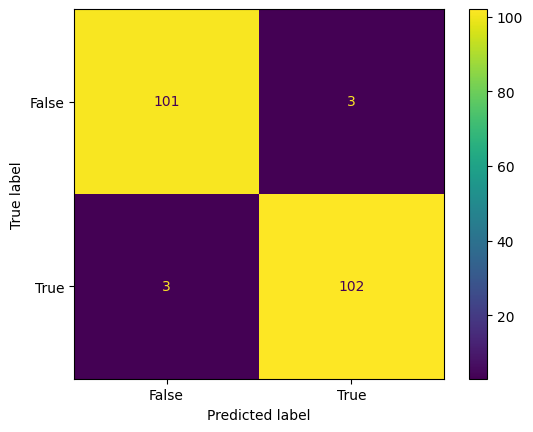

In [45]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, RF_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])

cm_display.plot()
plt.show()

In [46]:
print("\nClassification report:")
print(classification_report (y_test, RF_pred))


Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       104
           1       0.97      0.97      0.97       105

    accuracy                           0.97       209
   macro avg       0.97      0.97      0.97       209
weighted avg       0.97      0.97      0.97       209



## SVM with linear kernel

In [47]:
SVM_model = SVC(kernel = 'linear')
SVM_model.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
SVM_pred=SVM_model.predict(X_test)

In [49]:
SVM_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [50]:
accuracy_score(y_test,SVM_pred)

0.9569377990430622

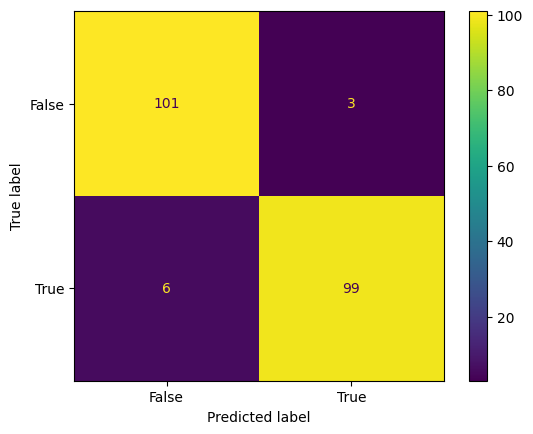

In [51]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, SVM_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])

cm_display.plot()
plt.show()

In [52]:
print("\nClassification report:")
print(classification_report (y_test, SVM_pred))


Classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       104
           1       0.97      0.94      0.96       105

    accuracy                           0.96       209
   macro avg       0.96      0.96      0.96       209
weighted avg       0.96      0.96      0.96       209



## KNN

In [53]:
KNN_model =KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
KNN_pred = KNN_model.predict(X_test)

In [55]:
KNN_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [56]:
accuracy_score(y_test,KNN_pred)

0.8995215311004785

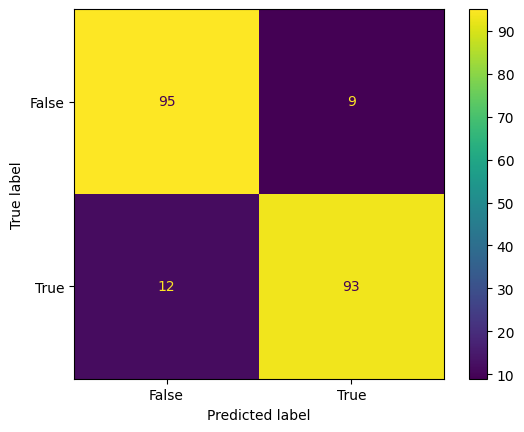

In [57]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, KNN_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])

cm_display.plot()
plt.show()

In [58]:
print("\nClassification report:")
print(classification_report (y_test, KNN_pred))


Classification report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       104
           1       0.91      0.89      0.90       105

    accuracy                           0.90       209
   macro avg       0.90      0.90      0.90       209
weighted avg       0.90      0.90      0.90       209



## KNN with loop k = 1 to 50

In [59]:
def my_accuracy(y_test,KNN_pred):
    acc = accuracy_score(y_true=y_test, KNN_pred=KNN_pred)
    print('Acc: {:.4f}'.format(acc))

In [60]:
def KNN_loop(X_train,y_train,x_test,MAX):

    # Loop MAX times
    for i in range(MAX):
        # Create the corresponding KNN Classifier
        KNeighClf = KNeighborsClassifier(n_neighbors=i+1)

        # Fit and predict the model
        KNN = KNeighClf.fit(X_train, y_train)
        KNN_pred = KNN.predict(X_test)

        # Display the results
        # my_confusion_matrix(y_test, y_pred)
        print ("Neighbors = " + str(i+1))
        my_accuracy(y_test,KNN_pred)

KNN_loop(X_train,y_train,X_test,50)

Neighbors = 1


TypeError: ignored

## Keras

In [153]:
model = Sequential()
model.add(Dense(500, input_dim=30, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [154]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [155]:
x_train_keras = np.array(X_train)
y_train_keras = np.array(y_train)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

In [156]:
history = model.fit(np.array(x_train_keras), np.array(y_train_keras),validation_data = (X_test,y_test), epochs=50, batch_size=100, shuffle=True)

Epoch 1/50
5/5 [==============================] - 1s 57ms/step - loss: 18.6997 - accuracy: 0.4763 - val_loss: 10.2777 - val_accuracy: 0.5024
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 7.4843 - accuracy: 0.5402 - val_loss: 9.4614 - val_accuracy: 0.5024
Epoch 3/50
5/5 [==============================] - 0s 10ms/step - loss: 5.3715 - accuracy: 0.5835 - val_loss: 3.3612 - val_accuracy: 0.7129
Epoch 4/50
5/5 [==============================] - 0s 15ms/step - loss: 3.2235 - accuracy: 0.7258 - val_loss: 1.1429 - val_accuracy: 0.7321
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 2.0673 - accuracy: 0.6165 - val_loss: 0.6428 - val_accuracy: 0.8469
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 1.4190 - accuracy: 0.8247 - val_loss: 0.8519 - val_accuracy: 0.8756
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 1.0150 - accuracy: 0.7814 - val_loss: 0.9080 - val_accuracy: 0.8182
Epoch 8/50
5/5 [=========

In [157]:
#model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=50, batch_size=100, shuffle=True)

In [158]:
scores = model.evaluate(np.array(X_test), np.array(y_test))

7/7 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9187


In [159]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 91.87%


In [160]:
# Get predictions
train_set_preds = [round(x[0]) for x in model.predict(X_train)]
test_set_preds = [round(x[0]) for x in model.predict(X_test)]

7/7 [==============================] - 0s 2ms/step


In [161]:
print('Accuracy for test set: %0.4f' % accuracy_score(y_test, test_set_preds))
print('Accuracy for train set: %0.4f' % accuracy_score(y_train, train_set_preds))

print('\n')
print("Precision for test set: %0.4f" % precision_score(y_test, test_set_preds, pos_label='positive', average='micro'))
print("Precision for train set: %0.4f" % precision_score(y_train, train_set_preds, pos_label='positive', average='micro'))

print('\n')
print("Recall for test set: %0.4f: " % recall_score(y_test, test_set_preds, pos_label='positive', average='micro'))
print("Recall for train set: %0.4f" % recall_score(y_train, train_set_preds, pos_label='positive', average='micro'))
print('\n')

Accuracy for test set: 0.9187
Accuracy for train set: 0.9278


Precision for test set: 0.9187
Precision for train set: 0.9278


Recall for test set: 0.9187: 
Recall for train set: 0.9278




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may 

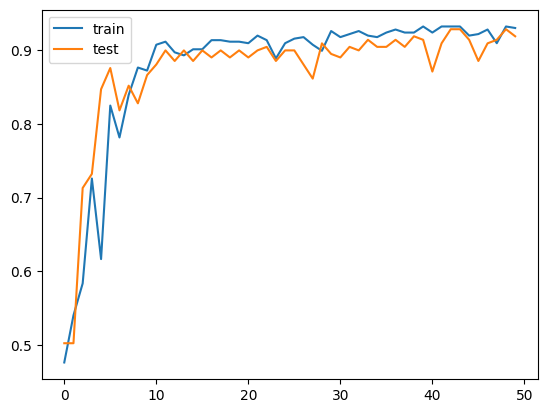

In [163]:
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Keras: Adding additional layers

In [192]:
model = Sequential()
model.add(Dense(500, input_dim=30, activation='relu'))
model.add(Dense(300, activation='relu'))  # Additional layer
model.add(Dense(100, activation='relu'))  # Additional layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [193]:
x_train_keras = np.array(X_train)
y_train_keras = np.array(y_train)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

In [206]:
history = model.fit(np.array(x_train_keras), np.array(y_train_keras),validation_data = (X_test,y_test), epochs=100, batch_size=100, shuffle=True)

Epoch 1/100
5/5 [==============================] - 0s 53ms/step - loss: 0.3086 - accuracy: 0.8598 - val_loss: 0.2514 - val_accuracy: 0.8995
Epoch 2/100
5/5 [==============================] - 0s 27ms/step - loss: 0.2978 - accuracy: 0.8887 - val_loss: 0.2452 - val_accuracy: 0.8995
Epoch 3/100
5/5 [==============================] - 0s 37ms/step - loss: 0.3125 - accuracy: 0.8784 - val_loss: 0.2433 - val_accuracy: 0.8947
Epoch 4/100
5/5 [==============================] - 0s 31ms/step - loss: 0.3621 - accuracy: 0.8639 - val_loss: 0.2434 - val_accuracy: 0.8995
Epoch 5/100
5/5 [==============================] - 0s 34ms/step - loss: 0.3575 - accuracy: 0.8804 - val_loss: 0.2592 - val_accuracy: 0.8852
Epoch 6/100
5/5 [==============================] - 0s 30ms/step - loss: 0.3269 - accuracy: 0.8722 - val_loss: 0.2609 - val_accuracy: 0.8947
Epoch 7/100
5/5 [==============================] - 0s 30ms/step - loss: 0.3003 - accuracy: 0.8784 - val_loss: 0.2580 - val_accuracy: 0.8995
Epoch 8/100
5/5 [===

In [210]:
scores = model.evaluate(np.array(X_test), np.array(y_test))

7/7 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.9139


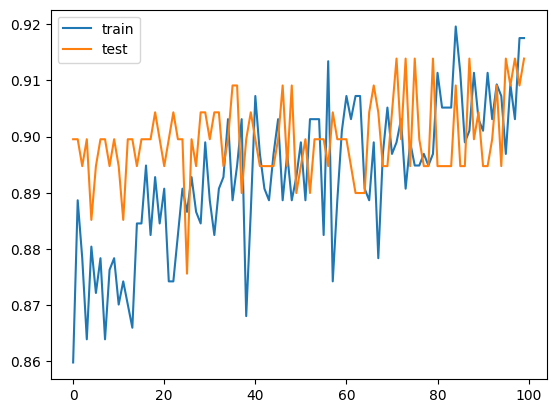

In [211]:
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Keras: Adding dropout function at additional layers


In [212]:
model = Sequential()
model.add(Dense(500, input_dim=30, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [213]:
x_train_keras = np.array(X_train)
y_train_keras = np.array(y_train)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

history = model.fit(np.array(x_train_keras), np.array(y_train_keras),validation_data = (X_test,y_test), epochs=50, batch_size=100, shuffle=True)

Epoch 1/50
5/5 [==============================] - 1s 59ms/step - loss: 29.4751 - accuracy: 0.5093 - val_loss: 1.2460 - val_accuracy: 0.5215
Epoch 2/50
5/5 [==============================] - 0s 20ms/step - loss: 13.5199 - accuracy: 0.5113 - val_loss: 12.3423 - val_accuracy: 0.5024
Epoch 3/50
5/5 [==============================] - 0s 21ms/step - loss: 8.4785 - accuracy: 0.5402 - val_loss: 0.8440 - val_accuracy: 0.7033
Epoch 4/50
5/5 [==============================] - 0s 21ms/step - loss: 6.1468 - accuracy: 0.5835 - val_loss: 4.8748 - val_accuracy: 0.5024
Epoch 5/50
5/5 [==============================] - 0s 20ms/step - loss: 3.1447 - accuracy: 0.6412 - val_loss: 0.3494 - val_accuracy: 0.8469
Epoch 6/50
5/5 [==============================] - 0s 18ms/step - loss: 3.2280 - accuracy: 0.6433 - val_loss: 1.1298 - val_accuracy: 0.5502
Epoch 7/50
5/5 [==============================] - 0s 17ms/step - loss: 2.2191 - accuracy: 0.6639 - val_loss: 0.7683 - val_accuracy: 0.6029
Epoch 8/50
5/5 [========

In [204]:
scores = model.evaluate(np.array(X_test), np.array(y_test))

7/7 [==============================] - 0s 4ms/step - loss: 0.2612 - accuracy: 0.8947


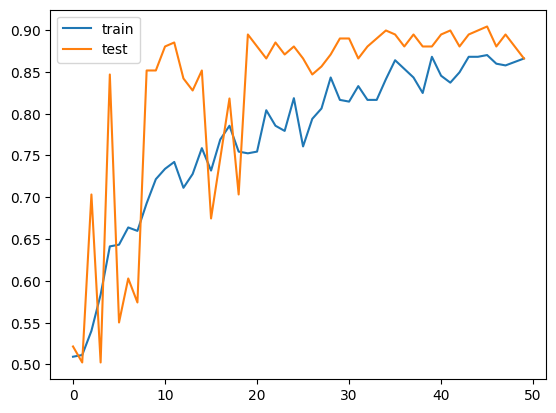

In [214]:
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()